<a href="https://colab.research.google.com/github/Hound36114/START-OF-PROJECTS/blob/main/Stock_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline
import seaborn as sns

In [21]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [22]:
import yfinance as yf

tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']
start = "2006-01-01"
end = "2016-01-01"

# Use yfinance to download all data at once
df = yf.download(tickers, start=start, end=end, group_by='ticker', auto_adjust=False)

[*********************100%***********************]  6 of 6 completed


In [23]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

In [24]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [25]:
bank_stocks.head()

Bank Ticker        BAC                                                      C  \
Stock Info        Open       High        Low      Close    Volume        Open   
Date                                                                            
2006-01-03   30.714878  30.885081  30.210821  30.819620  16296700  317.463485   
2006-01-04   30.767263  30.924374  30.407221  30.492323  17757900  316.556453   
2006-01-05   30.492302  30.655958  30.322099  30.531578  14970700  313.835443   
2006-01-06   30.636324  30.708333  30.341744  30.485762  12599800  316.686133   
2006-01-09   30.583954  30.747610  30.348290  30.505398  15619400  314.871945   

Bank Ticker                                               ...         MS  \
Stock Info         High         Low       Close   Volume  ...       Open   
Date                                                      ...              
2006-01-03   319.925438  311.697315  319.342346  1537600  ...  31.094315   
2006-01-04   318.111372  313.252237  313.446594  1870960  ...  31.926457   
2006-01-05   316.038248  313.576293  315.001648  1143160  ...  31.844882   
2006-01-06   316.815718  312.280523  315.001648  1370210  ...  31.964537   
2006-01-09   315.778979  312.928291  313.511383  1680740  ...  31.888400   

Bank Ticker                                                  WFC             \
Stock Info        High        Low      Close   Volume       Open       High   
Date                                                                          
2006-01-03   31.812254  30.860443  31.714354  5377000  18.391969  18.610228   
2006-01-04   32.241913  31.736094  31.736094  7977800  18.508380  18.520021   
2006-01-05   31.866638  31.556620  31.823126  5778000  18.333774  18.365785   
2006-01-06   32.008048  31.572935  31.855759  6889800  18.380327  18.493822   
2006-01-09   32.247368  31.882960  32.192978  4144500  18.435621  18.522926   

Bank Ticker                                  
Stock Info         Low      Close    Volume  
Date                                         
2006-01-03   18.156249  18.566576  11016400  
2006-01-04   18.255200  18.351234  10870000  
2006-01-05   18.223189  18.330864  10158000  
2006-01-06   18.266833  18.438530   8403800  
2006-01-09   18.365779  18.435621   5619600  

[5 rows x 30 columns]

In [26]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

,0
Bank Ticker,
BAC,37.271400
C,380.724335
GS,184.167282
JPM,53.346733
MS,49.715767
WFC,43.769432


r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}}

In [27]:
returns = pd.DataFrame()

In [28]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013813,-0.005772,0.000685,-0.011598
2006-01-05,0.001287,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007045,0.001025,0.005873
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


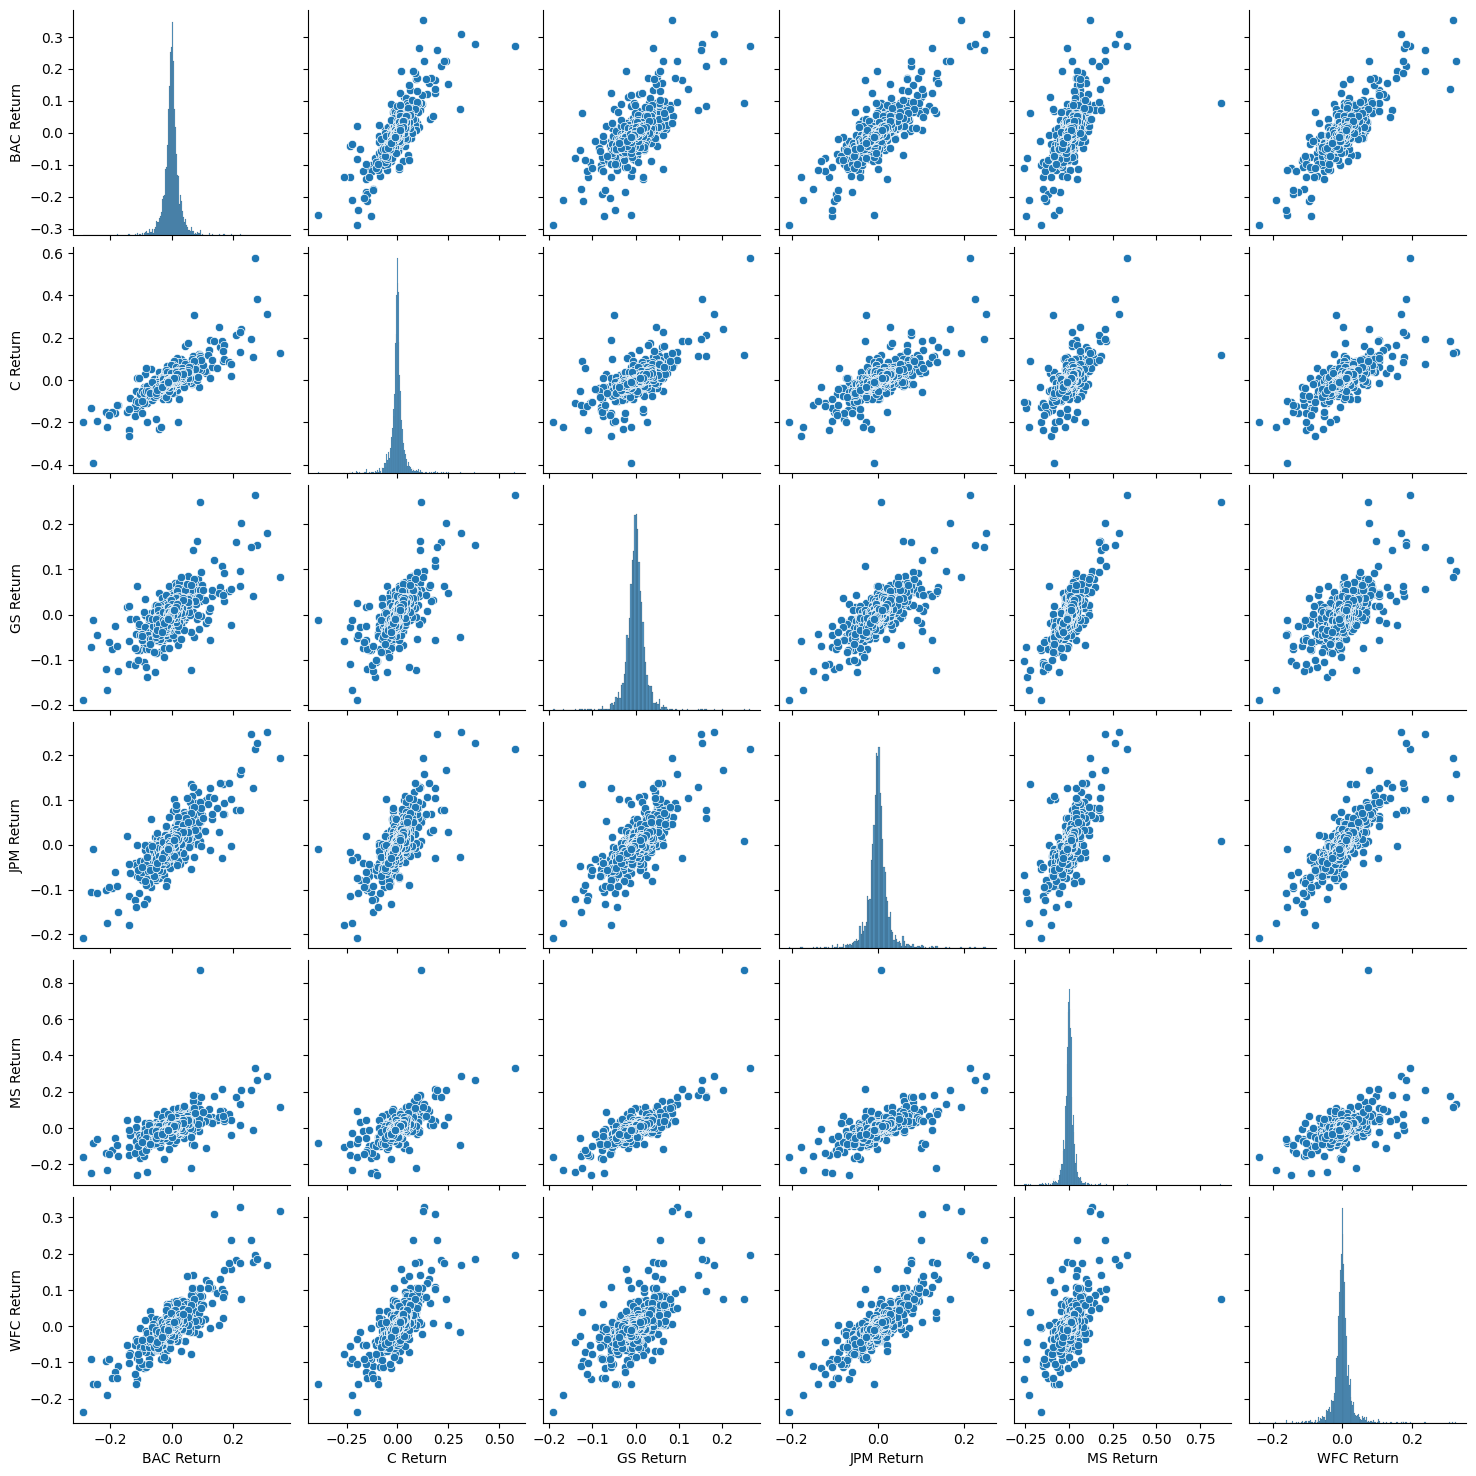

In [29]:
import seaborn as sns
sns.pairplot(returns[1:])

In [30]:
returns.idxmin()


,0
BAC Return,2009-01-20
C Return,2009-02-27
GS Return,2009-01-20
JPM Return,2009-01-20
MS Return,2008-10-09
WFC Return,2009-01-20


In [31]:
returns.idxmax()

,0
BAC Return,2009-04-09
C Return,2008-11-24
GS Return,2008-11-24
JPM Return,2009-01-21
MS Return,2008-10-13
WFC Return,2008-07-16


In [33]:
returns.loc['2006-01-01':'2016-12-31'].std()

,0
BAC Return,0.036659
C Return,0.038672
GS Return,0.025386
JPM Return,0.027675
MS Return,0.037717
WFC Return,0.030195


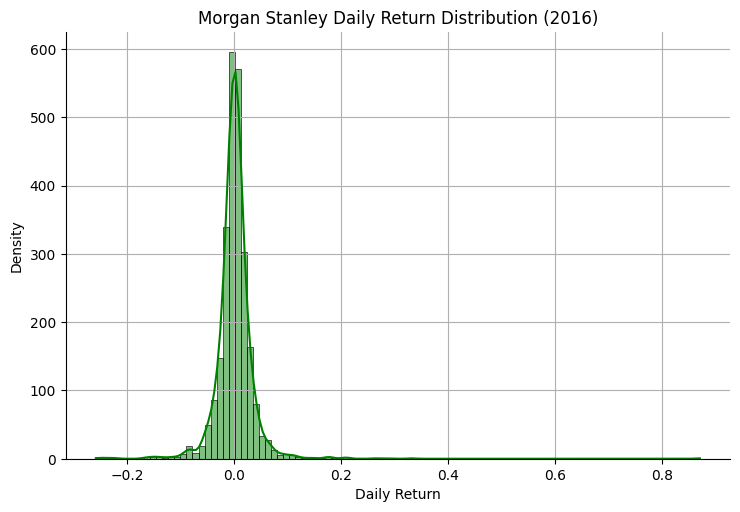

In [35]:

import matplotlib.pyplot as plt

sns.displot(
    data=returns,
    x='MS Return',
    bins=100,
    kde=True,
    color='green',
    height=5,        # controls the plot height in inches
    aspect=1.5       # width = height * aspect
)

plt.title("Morgan Stanley Daily Return Distribution (2016)")
plt.xlabel("Daily Return")
plt.ylabel("Density")
plt.grid(True)
plt.show()


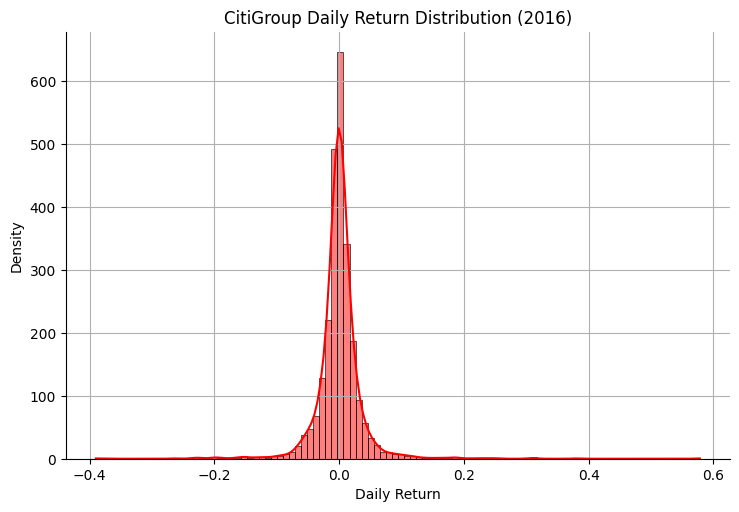

In [36]:
sns.displot(
    returns.loc['2006-01-01':'2016-12-31']['C Return'].dropna(),
    bins=100,
    kde=True,
    color='red',
    height=5,
    aspect=1.5
)

plt.title("CitiGroup Daily Return Distribution (2016)")
plt.xlabel("Daily Return")
plt.ylabel("Density")
plt.grid(True)
plt.show()

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

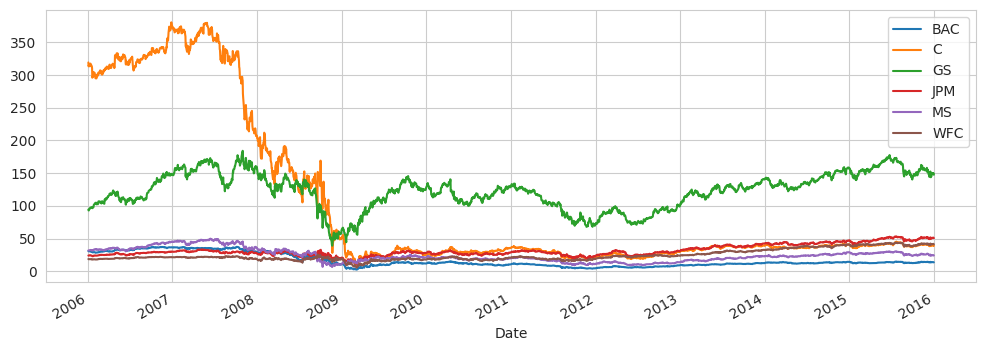

In [38]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

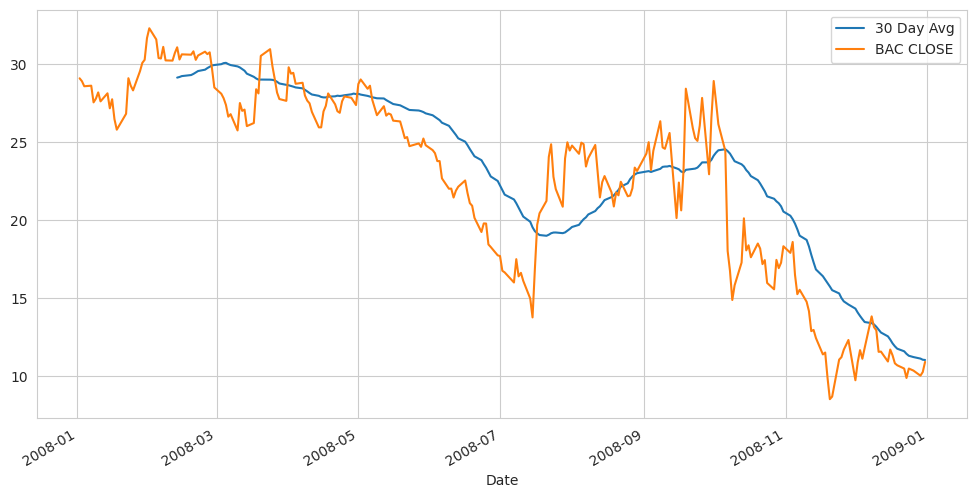

In [39]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

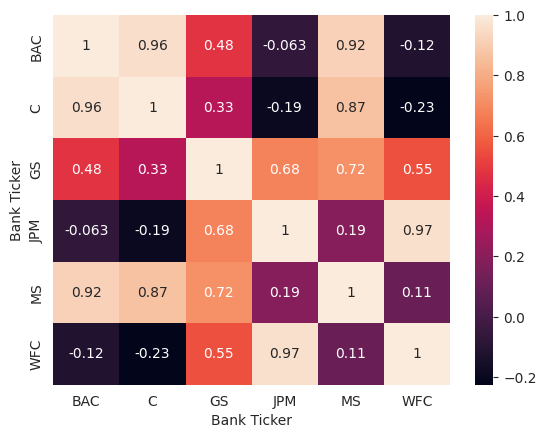

In [40]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

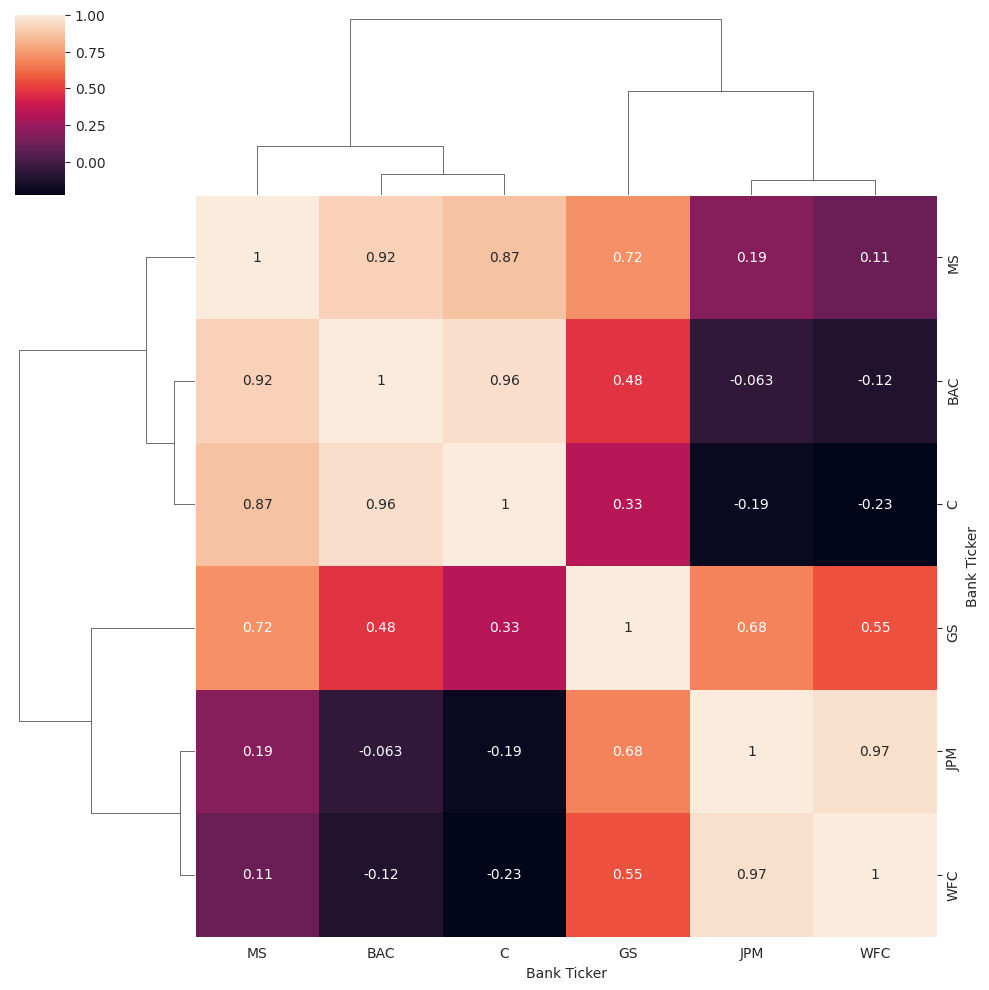

In [41]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)